FELIX YATOR CHERUTICH - IN14/00025/21
Mungai peter kinyanjui - IN14/00004/21
PURITY ADHIAMBO - IN14/00040/21


In [ ]:
# Install required libraries
!pip install keras nltk numpy


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import nltk
nltk.download('gutenberg')

from nltk.corpus import gutenberg

# Load Shakespeare's Hamlet
hamlet = gutenberg.words('shakespeare-hamlet.txt')

# Convert to a single string of text
text = ' '.join(hamlet).lower()

print("Text length:", len(text))
print("Sample text:", text[:500])


[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


Text length: 166764
Sample text: [ the tragedie of hamlet by william shakespeare 1599 ] actus primus . scoena prima . enter barnardo and francisco two centinels . barnardo . who ' s there ? fran . nay answer me : stand & vnfold your selfe bar . long liue the king fran . barnardo ? bar . he fran . you come most carefully vpon your houre bar . ' tis now strook twelue , get thee to bed francisco fran . for this releefe much thankes : ' tis bitter cold , and i am sicke at heart barn . haue you had quiet guard ? fran . not a mouse s


In [ ]:
# preprocessing
import numpy as np

# Create a dictionary of unique characters
chars = sorted(set(text))
char_to_idx = {c: i for i, c in enumerate(chars)}
idx_to_char = {i: c for i, c in enumerate(chars)}

# Define sequence length and stride
seq_length = 40  # Each input sequence will have 40 characters
stride = 3       # Step size

# Generate sequences
sequences = []
next_chars = []

for i in range(0, len(text) - seq_length, stride):
    sequences.append(text[i: i + seq_length])
    next_chars.append(text[i + seq_length])

print(f"Total sequences: {len(sequences)}")


Total sequences: 55575


In [ ]:
# Convert sequences into numerical format
X = np.zeros((len(sequences), seq_length, len(chars)), dtype=np.bool_)
y = np.zeros((len(sequences), len(chars)), dtype=np.bool_)

for i, seq in enumerate(sequences):
    for t, char in enumerate(seq):
        X[i, t, char_to_idx[char]] = 1
    y[i, char_to_idx[next_chars[i]]] = 1


In [ ]:
#Building a simple RNN model
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Activation

# Create the RNN model
model = Sequential([
    SimpleRNN(128, input_shape=(seq_length, len(chars))),
    Dense(len(chars)),
    Activation('softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam')

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 128)                 │          22,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 43)                  │           5,547 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 43)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,563 (107.67 KB)

 Trainable params: 27,563 (107.67 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Training the Model
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("rnn_text_gen.h5", monitor='loss', save_best_only=True)

model.fit(X, y, batch_size=128, epochs=20, callbacks=[checkpoint])


Epoch 1/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 2.7858

435/435 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 2.7847
Epoch 2/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 2.1895

435/435 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - loss: 2.1894
Epoch 3/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 2.0623

435/435 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step - loss: 2.0623
Epoch 4/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 2.0010

435/435 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - loss: 2.0010
Epoch 5/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 1.9408

435/435 ━━━━━━━━━━━━━━━━━━━━ 40s 46ms/step - loss: 1.9408
Epoch 6/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 1.9033

435/435 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - loss: 1.9033
Epoch 7/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 1.8609

435/435 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - loss: 1.8610
Epoch 8/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 1.8345

435/435 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - loss: 1.8345
Epoch 9/20
433/435 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 1.8015

435/435 ━━━━━━━━━━━━━━━━━━━━ 42s 50ms/step - loss: 1.8016
Epoch 10/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 1.7669

435/435 ━━━━━━━━━━━━━━━━━━━━ 38s 43ms/step - loss: 1.7669
Epoch 11/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 1.7544

435/435 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - loss: 1.7545
Epoch 12/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 1.7298

435/435 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - loss: 1.7298
Epoch 13/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 1.7059

435/435 ━━━━━━━━━━━━━━━━━━━━ 40s 45ms/step - loss: 1.7059
Epoch 14/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 1.6871

435/435 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - loss: 1.6871
Epoch 15/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 1.6661

435/435 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - loss: 1.6661
Epoch 16/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 1.6456

435/435 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - loss: 1.6456
Epoch 17/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 1.6301

435/435 ━━━━━━━━━━━━━━━━━━━━ 19s 43ms/step - loss: 1.6301
Epoch 18/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 1.6033

435/435 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - loss: 1.6034
Epoch 19/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 1.6105

435/435 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 1.6105
Epoch 20/20
433/435 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 1.5902

435/435 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - loss: 1.5902


In [ ]:
#generate text
import random

# Function to generate text
def generate_text(seed_text, length=200):
    generated = seed_text
    for _ in range(length):
        x_pred = np.zeros((1, seq_length, len(chars)))
        for t, char in enumerate(seed_text):
            x_pred[0, t, char_to_idx[char]] = 1

        predictions = model.predict(x_pred, verbose=0)[0]
        next_char = idx_to_char[np.argmax(predictions)]

        generated += next_char
        seed_text = seed_text[1:] + next_char  # Shift input

    return generated

# Try generating text
start_index = random.randint(0, len(text) - seq_length - 1)
seed = text[start_index:start_index + seq_length]
print(generate_text(seed))


same strict and most obseruant watch , see the seauen . i haue seees , and this faie of the with of hamlet , and the seare , and the seare , and the seare , and the seare , and the seare , and the seare , and the seare , and the seare , and


In [ ]:
#To improve performance, we replace SimpleRNN with GRU
from keras.layers import GRU

# Create a GRU-based model
model_gru = Sequential([
    GRU(128, input_shape=(seq_length, len(chars))),
    Dense(len(chars)),
    Activation('softmax')
])

model_gru.compile(loss='categorical_crossentropy', optimizer='adam')

# Train the GRU model
model_gru.fit(X, y, batch_size=128, epochs=20, callbacks=[checkpoint])


Epoch 1/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 61s 135ms/step - loss: 2.8416
Epoch 2/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 81s 132ms/step - loss: 2.1492
Epoch 3/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 58s 132ms/step - loss: 2.0044
Epoch 4/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 59s 136ms/step - loss: 1.9063
Epoch 5/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 58s 133ms/step - loss: 1.8374
Epoch 6/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 62s 143ms/step - loss: 1.7560
Epoch 7/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 78s 134ms/step - loss: 1.7207
Epoch 8/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 59s 135ms/step - loss: 1.6718
Epoch 9/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 81s 132ms/step - loss: 1.6420
Epoch 10/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 84s 137ms/step - loss: 1.5902
Epoch 11/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 1.5667

435/435 ━━━━━━━━━━━━━━━━━━━━ 80s 133ms/step - loss: 1.5667
Epoch 12/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 1.5309

435/435 ━━━━━━━━━━━━━━━━━━━━ 82s 133ms/step - loss: 1.5309
Epoch 13/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 1.5136

435/435 ━━━━━━━━━━━━━━━━━━━━ 82s 134ms/step - loss: 1.5135
Epoch 14/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 1.4734

435/435 ━━━━━━━━━━━━━━━━━━━━ 84s 139ms/step - loss: 1.4734
Epoch 15/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 1.4405

435/435 ━━━━━━━━━━━━━━━━━━━━ 57s 131ms/step - loss: 1.4405
Epoch 16/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 1.4145

435/435 ━━━━━━━━━━━━━━━━━━━━ 85s 138ms/step - loss: 1.4146
Epoch 17/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 1.3862

435/435 ━━━━━━━━━━━━━━━━━━━━ 58s 134ms/step - loss: 1.3863
Epoch 18/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 1.3669

435/435 ━━━━━━━━━━━━━━━━━━━━ 83s 136ms/step - loss: 1.3669
Epoch 19/20
435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 1.3303

435/435 ━━━━━━━━━━━━━━━━━━━━ 82s 137ms/step - loss: 1.3304
Epoch 20/20
434/435 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 1.3214

435/435 ━━━━━━━━━━━━━━━━━━━━ 83s 140ms/step - loss: 1.3214


In [ ]:
#generate text using the GRU
import random

# Function to generate text
def generate_text(seed_text, length=200):
    generated = seed_text
    for _ in range(length):
        x_pred = np.zeros((1, seq_length, len(chars)))
        for t, char in enumerate(seed_text):
            x_pred[0, t, char_to_idx[char]] = 1

        predictions = model.predict(x_pred, verbose=0)[0]
        next_char = idx_to_char[np.argmax(predictions)]

        generated += next_char
        seed_text = seed_text[1:] + next_char  # Shift input

    return generated

# Try generating text
start_index = random.randint(0, len(text) - seq_length - 1)
seed = text[start_index:start_index + seq_length]
print(generate_text(seed))


nol . i my lord , i would know that polon . i will with he well we the seare , and the seare , and the seare , and the seare , and the seare , and the seare , and the seare , and the seare , and the seare , and the seare , and the seare , a


In [ ]:
#Long Short-Term Memory (LSTM) networks as discussed in Chapter 6 of Hands-On Neural Networks with Keras.
#Install dependencies:
!pip install keras numpy pandas scikit-learn matplotlib
!pip install yfinance


In [ ]:
import yfinance as yf

# Fetch stock data for Apple (AAPL)
df = yf.download("AAPL", start="2010-01-01", end="2024-01-01")

# Keep only 'Close' price
df = df[['Close']]
df.reset_index(inplace=True)

# Display the first few rows
df.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Date,Close
Ticker,,AAPL
0,2010-01-04,6.440331
1,2010-01-05,6.451466
2,2010-01-06,6.348846
3,2010-01-07,6.337109
4,2010-01-08,6.379241


[*********************100%***********************]  1 of 1 completed


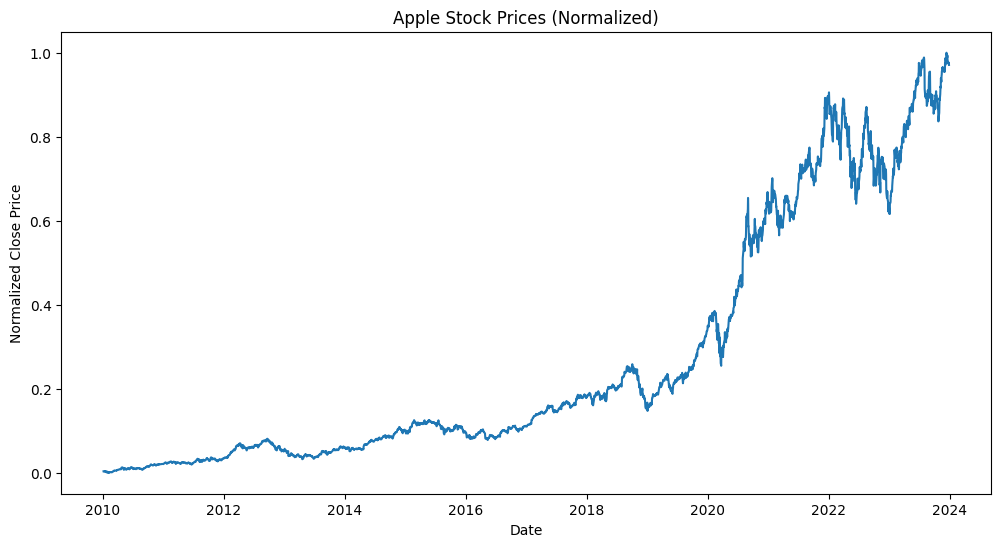

In [ ]:
#Load & Preprocess Data
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Download AAPL stock data from Yahoo Finance
df = yf.download("AAPL", start="2010-01-01", end="2024-01-01")[['Close']]
df.reset_index(inplace=True)

# Normalize 'Close' prices between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
df['Close'] = scaler.fit_transform(df[['Close']])

# Plot data
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'])
plt.title("Apple Stock Prices (Normalized)")
plt.xlabel("Date")
plt.ylabel("Normalized Close Price")
plt.show()


In [ ]:
#Create Sequences for LSTM
def create_sequences(data, look_back=50):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data.iloc[i:i+look_back]['Close'].values)  # Only 'Close' column
        Y.append(data.iloc[i+look_back]['Close'])
    return np.array(X), np.array(Y)

# Train-test split (80% train, 20% test)
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# Generate sequences
look_back = 50  # Use last 50 days to predict next day
X_train, y_train = create_sequences(train_data, look_back)
X_test, y_test = create_sequences(test_data, look_back)

# Reshape for LSTM input (samples, time_steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print("Data Ready - X_train shape:", X_train.shape, "y_train shape:", y_train.shape)


Data Ready - X_train shape: (2767, 50, 1) y_train shape: (2767, 1)


In [ ]:
#Before creating sequences, make sure the Close column is numeric
# Ensure DataFrame is properly structured
print(df.columns)  # Check column names
print(df.dtypes)  # Check column data types

# If 'Close' is multi-indexed, reset columns
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(1)

# Select only 'Close' column safely
if 'Close' not in df.columns:
    df.rename(columns={df.columns[0]: 'Close'}, inplace=True)  # Rename first column to 'Close'

# Convert 'Close' to numeric
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

# Drop NaN values
df.dropna(inplace=True)

# Check final structure
print(df.head())
print(df.dtypes)


MultiIndex([('Close', 'AAPL')],
           names=['Price', 'Ticker'])
Price  Ticker
Close  AAPL      float64
dtype: object
Ticker     Close
0       6.440331
1       6.451466
2       6.348846
3       6.337109
4       6.379241
Ticker
Close    float64
dtype: object


In [ ]:
print(df.head())  # Verify structure
print(df.dtypes)  # Ensure 'Close' is float64


Ticker     Close
0       6.440331
1       6.451466
2       6.348846
3       6.337109
4       6.379241
Ticker
Close    float64
dtype: object


In [ ]:
# Split into training (80%) and testing (20%)
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

print(f"Training Data: {train_data.shape}, Testing Data: {test_data.shape}")


Training Data: (2817, 1), Testing Data: (705, 1)


In [ ]:
#Create Sequences for LSTM
import numpy as np

def create_sequences(data, look_back=50):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data.iloc[i:i+look_back]['Close'].values)  # Select only 'Close'
        Y.append(data.iloc[i+look_back]['Close'])  # Target is next day price
    return np.array(X), np.array(Y)

# Generate sequences
look_back = 50
X_train, y_train = create_sequences(train_data, look_back)
X_test, y_test = create_sequences(test_data, look_back)

# Reshape for LSTM (samples, time_steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print("Data Ready - X_train shape:", X_train.shape, "y_train shape:", y_train.shape)


Data Ready - X_train shape: (2767, 50, 1) y_train shape: (2767, 1)


In [ ]:
#Build & Train LSTM Model
#We define an LSTM model with two LSTM layers and a Dense output layer.
import numpy as np

# Ensure X_train and y_train are numpy arrays of float32
X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

# Print shapes and data types
print("Data Ready:")
print("X_train shape:", X_train.shape, "dtype:", X_train.dtype)
print("y_train shape:", y_train.shape, "dtype:", y_train.dtype)


Data Ready:
X_train shape: (2767, 50, 1) dtype: float32
y_train shape: (2767, 1) dtype: float32


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),  # First LSTM layer
    Dropout(0.2),
    LSTM(50),  # Second LSTM layer
    Dense(1)  # Output layer for prediction
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - loss: 1553.3485 - val_loss: 21463.2598
Epoch 2/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 1010.7640 - val_loss: 20093.6289
Epoch 3/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 993.1855 - val_loss: 19010.0449
Epoch 4/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 799.2418 - val_loss: 18047.0938
Epoch 5/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 671.7606 - val_loss: 17164.7969
Epoch 6/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 569.1597 - val_loss: 16356.1270
Epoch 7/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 543.1431 - val_loss: 15611.1729
Epoch 8/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 543.2412 - val_loss: 14916.0430
Epoch 9/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 476.4635 - val_loss: 14287.5742
Epoch 10/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 428.3400 - val_loss: 13693.6211
Epoch 11/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 362.0109 - val_loss: 1314

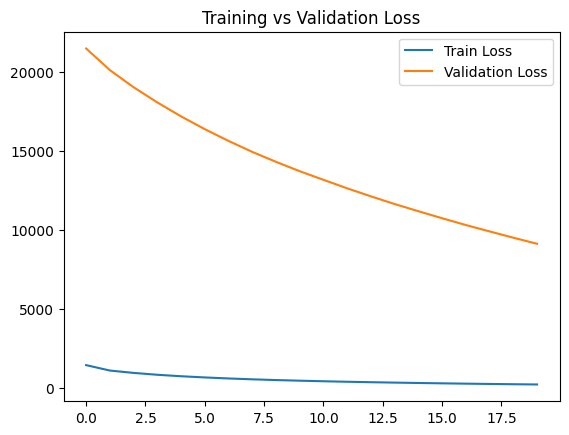

In [ ]:
#Evaluate & Predict
#Plot Training Loss

import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()




21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


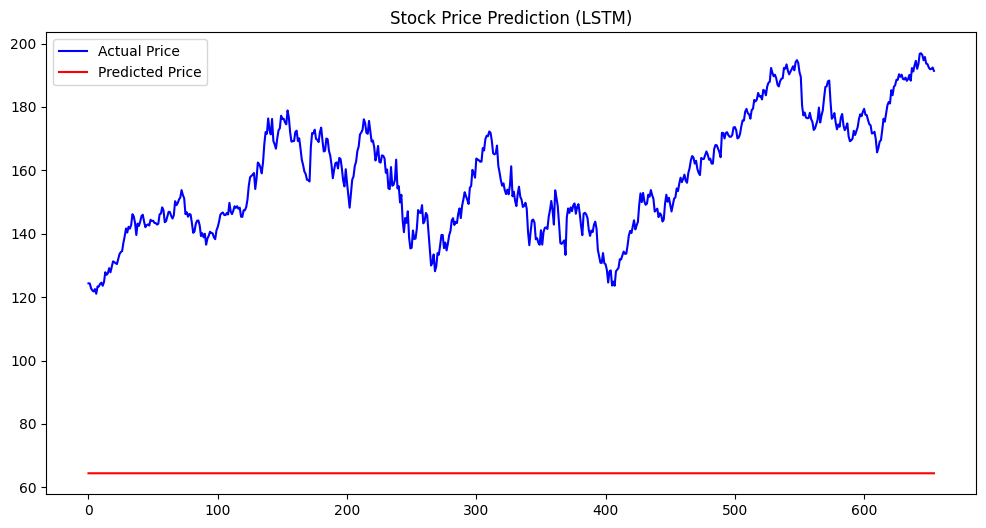

In [ ]:
#Now lets make predictions
# Predict stock prices
predictions = model.predict(X_test)

# Inverse transform predictions (if data was normalized)
predictions = predictions.reshape(-1, 1)  # Ensure correct shape

# Plot actual vs predicted prices
plt.figure(figsize=(12,6))
plt.plot(y_test, label="Actual Price", color='blue')
plt.plot(predictions, label="Predicted Price", color='red')
plt.legend()
plt.title("Stock Price Prediction (LSTM)")
plt.show()
